# Attendance

[The link to SEAts](https://goldsmithscollege.sharepoint.com/sites/intranet-supporting-students/SitePages/SEAtS--QR-codes-for-check-in.aspx?utm_campaign=SEAtS%20reminder%2027.09.22&utm_source=emailCampaign&utm_content=&utm_medium=email)

[Evaluations!](https://forms.office.com/pages/responsepage.aspx?id=Px9DDcEgHEaVikaynU4CG_MPaGB4XvhInXIkVKebiidUQ0UwSlIyRzU3QU9DR0xKWkE3UU1FM1hOSC4u) 🙏

---

## 11.4 The Transformer architecture


In [1]:
import os, pathlib, shutil, random
import numpy as np

import matplotlib.pyplot as plt

from IPython.display import YouTubeVideo

import tensorflow as tf

### The Transformer architecture

<!-- <img style="float:right" src="images/transformer/the-annotated-transformer_14_0.transformer-full.png"> -->
<img style="float:right" src="https://drive.google.com/uc?id=1q24jSyMvzKI160pR6VDmY30i7ulwHKIK">


<small style="position:absolute;bottom:0;right:0">[Vaswani et al, "Attention Is All You Need"](https://arxiv.org/abs/1706.03762)</small>

The **Transformer** architecture was developed for NLP, specifically for translation.

The dual architecture pattern (*sequence to sequence*) reflects this:
- the left-hand side (**"reading"**) transforms an **input** sentence into abstract representations;
- the right hand side (**"generation"**) transforms the **output** sentence into abstract representations;
- the output probabilities ("what is the next token?") are produced on the basis of both branches!

### Transormers: before

<!-- <img style="float:right;height:650px" src="images/transformer/beyer.takeover.1.png"> -->
<img style="float:right;height:650px" src="https://drive.google.com/uc?id=1eszhlZ8HZZPMTPbo0FRt_tzfLxPhJ0mP">

<small style="position:absolute;bottom:0;right:0">[Lucas Beyer, "Transformers"](https://docs.google.com/presentation/d/1ZXFIhYczos679r70Yu8vV9uO6B1J0ztzeDxbnBxD1S0/edit#slide=id.g13dd67c5ab8_0_79)</small>

### Transormers: after

<!-- <img style="float:right;height:650px" src="images/transformer/beyer.takeover.2.png"> -->
<img style="float:right;height:650px" src="https://drive.google.com/uc?id=1q3IxP6Y92OB8tPE6dEP-Itf_w1radAUS">

<small style="position:absolute;bottom:0;right:0">[Lucas Beyer, "Transformers"](https://docs.google.com/presentation/d/1ZXFIhYczos679r70Yu8vV9uO6B1J0ztzeDxbnBxD1S0/edit#slide=id.g13dd67c5ab8_0_79)</small>

### Three variants/applications

<!-- <img style="float:right;height:650px" src="images/transformer/beyer.gpt-bert-t5.png"> -->
<img style="float:right;height:650px"  src="https://drive.google.com/uc?id=1R6-AfvTpIeuFqLMRhKtHPi2yTWBbDvf4">

<small style="position:absolute;bottom:0;right:0">[Lucas Beyer, "Transformers"](https://docs.google.com/presentation/d/1ZXFIhYczos679r70Yu8vV9uO6B1J0ztzeDxbnBxD1S0/edit#slide=id.g13dd67c5ab8_0_79)</small>

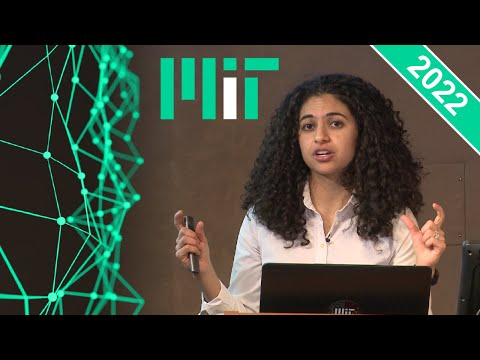

In [12]:
YouTubeVideo('QvkQ1B3FBqA', width=853, height=480, start=2592) #  MIT 6.S191: Recurrent Neural Networks and Transformers 


### Tutorials

[Classify text with BERT](https://www.tensorflow.org/text/tutorials/classify_text_with_bert) (what is done below, without building the net)  
[Neural machine translation with a Transformer and Keras](https://www.tensorflow.org/text/tutorials/transformer) (building the net from scratch, on another task)  
More in the notebook [`chapter11_part04_sequence_to_sequence_learning.ipynb`](https://drive.google.com/file/d/1EPPh0vjqwLgzWBlf9TVGZ9dVbo3g4vgW/view?usp=share_link).

### References


[Lucas Beyer, "Transformers"](https://docs.google.com/presentation/d/1ZXFIhYczos679r70Yu8vV9uO6B1J0ztzeDxbnBxD1S0/edit#slide=id.g13dd67c5ab8_0_79)  
[Jay Alammar, "The Illustrated Transformer"](https://jalammar.github.io/illustrated-transformer/)  
[Vaswani et al, "Attention Is All You Need"](https://arxiv.org/abs/1706.03762)  
[Tensor2Tensor Colab](https://colab.research.google.com/github/tensorflow/tensor2tensor/blob/master/tensor2tensor/notebooks/hello_t2t.ipynb)  
[Peter Bloem, "Transformers From Scratch"](https://peterbloem.nl/blog/transformers) (in PyTorch!)  
[The Annotated Transformer](http://nlp.seas.harvard.edu/annotated-transformer/) (same)  
[BertViz, Visualize Attention in NLP Models](https://github.com/jessevig/bertviz)

---

### 11.4.1 Understanding self-attention

#### Generalized self-attention: the query-key-value model

<!-- <img style="" src="images/transformer/chollet.key-query-value.png"> -->
<img src="https://drive.google.com/uc?id=15LCzqL9oR3kioVvga81Yj_6nHS5AE83P">


<small>DLWP, p.341</small>

<!-- <img style="" src="images/transformer/chollet.attention.1.png"> -->
<img src="https://drive.google.com/uc?id=1IcyBAgESZt-CgYXp6JOd-2oIYpwyIKkR">


<small>DLWP, p.337</small>

### The operations of attention

\begin{align*}
\mathrm{Attention}(Q, K, V) &= \bbox[5px,border:2px solid red]{softmax(\frac{QK^T}{\sqrt{d_k}})V}\\
\\
 &= \bbox[5px,border:2px solid red]{“softmax(\mathrm{Query} \cdot \mathrm{Keys)} \cdot \mathrm{Values}”}\\
\end{align*}

$Q$: queries  
$K$: keys  
$V$: values  
$\sqrt{d_k}$: scaling factor, $d_k$: dimension of $Q$ (same as $K$), to prevent small gradients

#### Notes

- We saw the concept of a **gate** being like a smooth 1/0 switch. Here the *softmax* is used in the same way, for a whole array of values (letting that information flow or not).
- The dot product is a fairly straightforward **similarity measure** between two vectors.

Attention allows a network to make decisions about the importance of various parts of the input, and learn **complex internal patterns**.

In this example, "it" could refer to "animal" or to "street", and resolving this depends on **meaning** (and syntax).

<!-- <div style="display:flex;justify-content:center">
    <img src="images/transformer/attention.png">
    <img src="images/transformer/attention.2.png">
</div> -->

<div style="display:flex">
    <img src="https://drive.google.com/uc?id=1MeUNzq617_fcx0tXgYQPUGk5gCe_aYSk">
    <img src="https://drive.google.com/uc?id=1IgQ-14OgGQ07VuOgKDEy6efv1Bmh3edv">
</div>

<small>["Transformer: A Novel Neural Network Architecture for Language Understanding", Google Reseearch Blog](https://ai.googleblog.com/2017/08/transformer-novel-neural-network.html)</small>

### Self-attention

In the standard case, we are calculating the similarity of parts of the data **with itself**.

We are creating a **new representation** of the word station taking the context into account.

For example, our new representation would know this station is a *train* (not space or radio) station...

<!-- <imgsrc="images/transformer/chollet.attention.2.png"> -->
<img src="https://drive.google.com/uc?id=1f8fDh736YaiUauP2G5RK4mbknYenSYSj">


<small>DLWP, p.338</small>

### Cross-attention

It is possible to have a query coming from one source (**target**) and the key/values from another (**source**)!

<!-- <img style="float:right;height:600px" src="images/transformer/beyer.cross-attention.png"> -->
<img style="float:right;height:600px"  src="https://drive.google.com/uc?id=1fq19uEJd52_qDf1qmcV9BZWdCcstx1M7">

<small style="position:absolute;bottom:0;right:0">[Lucas Beyer, "Transformers"](https://docs.google.com/presentation/d/1ZXFIhYczos679r70Yu8vV9uO6B1J0ztzeDxbnBxD1S0/edit#slide=id.g13dd67c5ab8_0_79)</small>

### Attention & masking

Notice the **optional masking operation**: on the right-hand side of the Transformer (generation), we use a mask that effectively prevents any look-up into the future.

<!-- <img style="float:right;height:400px" src="images/transformer/the-annotated-transformer_33_0.attention.png"> -->
<img style="float:right;height:400px" src="https://drive.google.com/uc?id=1A2kVfK5BZjOCNanqIiI3-td6g53yjsYD">

<small style="position:absolute;bottom:0;right:0">[Vaswani et al, "Attention Is All You Need"](https://arxiv.org/abs/1706.03762)</small>

### Causal Masking

To prevent certain positions to be accessed, multiplying them by large negative number translates into a near zero value after the $softmax$. 

<!-- <img src="images/transformer/masked-attention.png"> -->
<img src="https://drive.google.com/uc?id=1RY2QTlDq_S3dk6gXvlENQiOZkH5MFmIs">

<small>[Peter Bloem, "Transformers From Scratch"](https://peterbloem.nl/blog/transformers)</small>

---

### 11.4.2 Multi-head attention

The author found it beneficial to **subdivide the embedding space** into multiple $Queries$, $Keys$ and $Values$, each called **attention heads** looking for different *types* of information (each looks at the **whole sequence** differently)! Perk: the overall matrix multiplication operations and shapes remain the same.

*Similar to the idea of several kernels scanning the same image in search of different features!*

<!-- <img style="float:right;height:500px" src="images/transformer/the-annotated-transformer_38_0.multi-head.png"> -->
<img style="float:right;height:500px" src="https://drive.google.com/uc?id=1czm7kPUHVZ45awcrYSAWFSzfhOO3y0EL">


<small style="position:absolute;bottom:0;right:0">[Vaswani et al, "Attention Is All You Need"](https://arxiv.org/abs/1706.03762)</small>

### BertViz

Visualise what different heads learn!

<!-- <img src="images/transformer/bertviz.head-view.gif"> -->
<img src="https://drive.google.com/uc?id=1au7QjBPdNzXjt9yqgN5sUJ856Up93ZvS">

<small>[BertViz, Visualize Attention in NLP Models](https://github.com/jessevig/bertviz)</small>

### Attention is cheap: if your input sequence is short(ish)

The bulk of the computation happens in the `sequence_length` * `sequence_length` matrices!

<!-- <img src="images/transformer/vaswani-huang.attention-is-cheap.png"> -->
<img src="https://drive.google.com/uc?id=13FGpA1jibRY_1Gm6lRn3m5nFX55RDYlf">

<small>[Ashish Vaswani and Anna Huang, "Self-Attention For Generative Models", CS224n Stanford](https://web.stanford.edu/class/cs224n/slides/cs224n-2019-lecture14-transformers.pdf)</small>

### Positional Encoding

**Attention in itself ignores word order!**

But we can reinject that information in the form of a **second embedding layer** that is added to the first one, and whose job is to encode positional information. This time we just embed **positions** (1,2,...).

#### Note

The original paper had a subtle approach to this, and as often happens there are a few variants out there.

[What is the positional encoding in the transformer model?](https://datascience.stackexchange.com/questions/51065/what-is-the-positional-encoding-in-the-transformer-model)  
[Amirhossein Kazemnejad, "Transformer Architecture: The Positional Encoding"](https://kazemnejad.com/blog/transformer_architecture_positional_encoding/)
[Mehreen Saeed, "A Gentle Introduction to Positional Encoding in Transformer Models, Part 1"](https://machinelearningmastery.com/a-gentle-introduction-to-positional-encoding-in-transformer-models-part-1/)  
[Mehreen Saeed, "The Transformer Positional Encoding Layer in Keras, Part 2"](https://machinelearningmastery.com/the-transformer-positional-encoding-layer-in-keras-part-2/)

### Comparisons of various NLP approaches

<!-- ![Chollet types of language modles](images/nlp/chollet.types-of-lms.346.png) -->
<img src="https://drive.google.com/uc?id=1dWw93-8kTochnEZXUurkGLu8WS5wR9-D">

<small>DLWP, p.346</small>

### Quite a few more bells & whistles (as usual)

- Technically there's almost no nonlinearity in attention → adding small dense nets between blocks!
- Using **Layer Normalization** to stabilise the data & gradient flow (next week);
- Using **Residual Connections** to stabilise the data & gradient  flow (next week);
- Using fancy **learning rate schedules** during training (next week).

---

### 11.4.3 The Transformer encoder


<!-- <img style="float:right;height:600px" src="images/transformer/beyer.encoder.png"> -->
<img style="float:right;height:600px"  src="https://drive.google.com/uc?id=1rJ0f-a5J0aPciRjCPEkykwN-5t5wZttV">

<small style="position:absolute;bottom:0;right:0">[Lucas Beyer, "Transformers"](https://docs.google.com/presentation/d/1ZXFIhYczos679r70Yu8vV9uO6B1J0ztzeDxbnBxD1S0/edit#slide=id.g13dd67c5ab8_0_79)</small>

#### Downloading the data

```bash
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz
!rm -r aclImdb/train/unsup
```

#### Preparing the data

In [2]:
batch_size = 32
base_dir = pathlib.Path("aclImdb")
train_dir = base_dir / "train"
val_dir = base_dir / "val"
test_dir = base_dir / "test"

for category in ("neg", "pos"):
    if not os.path.isdir(val_dir / category):    # do this only once
        os.makedirs(val_dir / category)          # make 'neg'/'pos' dir in validation
        files = os.listdir(train_dir / category) # list files in 'train'
        random.Random(1337).shuffle(files)       # shuffle using a seed
        num_val_samples = int(0.2 * len(files))  # 2% of our samples for validation
        val_files = files[-num_val_samples:]
        for fname in val_files:                  # move our files
            shutil.move(
                train_dir / category / fname,
                val_dir / category / fname
            )

In [3]:
train_ds = tf.keras.utils.text_dataset_from_directory(
    train_dir, batch_size=batch_size
)
val_ds = tf.keras.utils.text_dataset_from_directory(
    val_dir, batch_size=batch_size
)
test_ds = tf.keras.utils.text_dataset_from_directory(
    test_dir, batch_size=batch_size
)
text_only_train_ds = train_ds.map(lambda x, y: x)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.
Found 25000 files belonging to 2 classes.


#### Vectorizing the data

In [4]:
max_length = 600
max_tokens = 20000
text_vectorization = tf.keras.layers.TextVectorization(
    max_tokens=max_tokens,
    output_mode="int",
    output_sequence_length=max_length,
)
text_vectorization.adapt(text_only_train_ds)

int_train_ds = train_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
int_val_ds = val_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
int_test_ds = test_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)

#### The Transformer encoder implemented as a subclassed `Layer`

In [5]:
class TransformerEncoder(tf.keras.layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim                               # parameters
        self.dense_dim = dense_dim                               # ! dense_dim % num_head must be zero! (divisibility)
        self.num_heads = num_heads
        self.attention = tf.keras.layers.MultiHeadAttention(     # multi-head attention layer
            num_heads=num_heads, key_dim=embed_dim
        )
        self.dense_proj = tf.keras.Sequential(                   # dense layer on top: like a nonlinearity
            [tf.keras.layers.Dense(dense_dim, activation="relu"),
             tf.keras.layers.Dense(embed_dim),]
        )
        self.layernorm_1 = tf.keras.layers.LayerNormalization()  # layer norm
        self.layernorm_2 = tf.keras.layers.LayerNormalization()

    def call(self, inputs, mask=None):
        if mask is not None:                                     # optional mask (used mostly in the decoder)
            mask = mask[:, tf.newaxis, :]
        attention_output = self.attention(
            inputs, inputs, attention_mask=mask                  # only two inputs! Value is used as key as well
        )
        proj_input = self.layernorm_1(inputs + attention_output) # inputs + attn: residual connection
        proj_output = self.dense_proj(proj_input)                # dense layer on top: like a nonlinearity
        return self.layernorm_2(proj_input + proj_output)

    def get_config(self):                                        # retrieve config as a dict
        config = super().get_config()                            # (required for Keras layers)
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "dense_dim": self.dense_dim,
        })
        return config


#### Using the Transformer encoder for text classification

In [6]:
vocab_size = 20000
embed_dim = 256
num_heads = 2
dense_dim = 32

inputs = tf.keras.Input(shape=(None,), dtype="int64")
x = tf.keras.layers.Embedding(vocab_size, embed_dim)(inputs) # 1. Regular embeddings
x = TransformerEncoder(embed_dim, dense_dim, num_heads)(x)   # 2. Transformer encoder
x = tf.keras.layers.GlobalMaxPooling1D()(x)                  # (reduce full sequence to a single vector...)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs, outputs)
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 256)         5120000   
                                                                 
 transformer_encoder (Transf  (None, None, 256)        543776    
 ormerEncoder)                                                   
                                                                 
 global_max_pooling1d (Globa  (None, 256)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257   

#### Training and evaluating the Transformer encoder based model

In [8]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        base_dir / "transformer_encoder.keras",
        save_best_only=True

    )
]
history = model.fit(
    int_train_ds,
    validation_data=int_val_ds,
    epochs=20,
    callbacks=callbacks
)

Epoch 1/20
625/625 [==============================] - 59s 95ms/step - loss: 0.3720 - accuracy: 0.8385 - val_loss: 0.2777 - val_accuracy: 0.8802
Epoch 2/20
625/625 [==============================] - 60s 96ms/step - loss: 0.2924 - accuracy: 0.8788 - val_loss: 0.2888 - val_accuracy: 0.8774
Epoch 3/20
625/625 [==============================] - 61s 98ms/step - loss: 0.2312 - accuracy: 0.9060 - val_loss: 0.2481 - val_accuracy: 0.8958
Epoch 4/20
625/625 [==============================] - 61s 97ms/step - loss: 0.1821 - accuracy: 0.9293 - val_loss: 0.2835 - val_accuracy: 0.8914
Epoch 5/20
625/625 [==============================] - 61s 98ms/step - loss: 0.1482 - accuracy: 0.9439 - val_loss: 0.3230 - val_accuracy: 0.8864
Epoch 6/20
625/625 [==============================] - 62s 99ms/step - loss: 0.1259 - accuracy: 0.9513 - val_loss: 0.4009 - val_accuracy: 0.8656
Epoch 7/20
625/625 [==============================] - 62s 99ms/step - loss: 0.1067 - accuracy: 0.9608 - val_loss: 0.4052 - val_accuracy:

In [17]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    epochs = range(1, len(loss) + 1)
    ax1.plot(epochs, loss, label="Training")
    ax1.plot(epochs, val_loss, label="Validation")
    ax1.set_title("Training and validation loss")
    ax1.legend()
    ax2.plot(epochs, acc, label="Training")
    ax2.plot(epochs, val_acc, label="Validation")
    ax2.set_title("Training and validation accuracy")
    ax2.legend()
    plt.show()

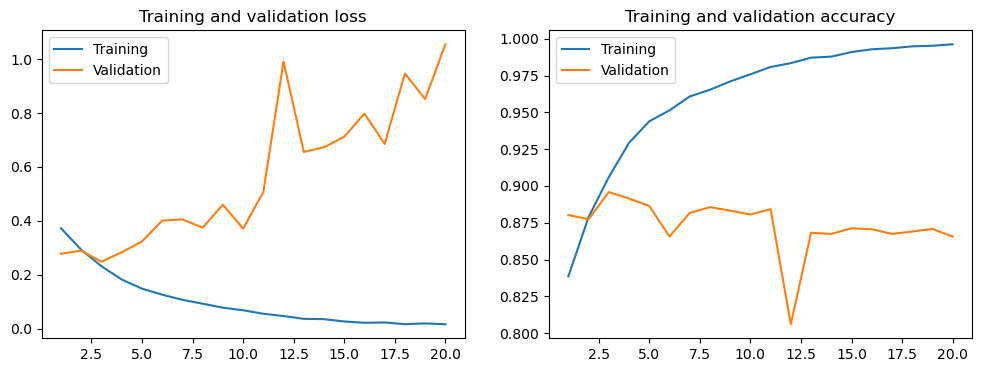

In [18]:
plot_history(history) # a LOT of overfitting

In [19]:
model = tf.keras.models.load_model(
    base_dir / "transformer_encoder.keras",
    custom_objects={"TransformerEncoder": TransformerEncoder}
)
print(f"Test acc: {model.evaluate(int_test_ds)[1]:.3f}")

782/782 [==============================] - 26s 33ms/step - loss: 0.2853 - accuracy: 0.8810
Test acc: 0.881


#### Implementing positional embedding as a subclassed layer

In [20]:
class PositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, sequence_length, input_dim, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.token_embeddings = tf.keras.layers.Embedding(       # token embeddings: semantic information
            input_dim=input_dim, output_dim=output_dim
        )
        self.position_embeddings = tf.keras.layers.Embedding(    # position embeddings: syntactic/spatial information
            input_dim=sequence_length, output_dim=output_dim
        )
        self.sequence_length = sequence_length                   # more params
        self.input_dim = input_dim
        self.output_dim = output_dim

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        embedded_tokens = self.token_embeddings(inputs)          # 1. create token embeddings
                                                                 # 2. create pos embeddings
        positions = tf.range(start=0, limit=length, delta=1)     #    (as many as our input length, delta: step size)
        embedded_positions = self.position_embeddings(positions)
        
        return embedded_tokens + embedded_positions              # 3. Both embeddings are simply added together!

    def compute_mask(self, inputs, mask=None):                   # Turns int sequences into a mask, example:
        return tf.math.not_equal(inputs, 0)                      # [ 12   3    54   3    0     0     ]
                                                                 # [ True True True True False False ]

    def get_config(self):                                        # retrieve config as a dict
        config = super().get_config()                            # (required for Keras layers)
        config.update({
            "output_dim": self.output_dim,
            "sequence_length": self.sequence_length,
            "input_dim": self.input_dim,
        })
        return config

#### Putting it all together: A text-classification Transformer

We go from a **sequence** to a(n abstract) **representation** (= BERT).

<!-- <img style="float:right;height:600px" src="images/transformer/beyer.encoder.png"> -->
<img style="float:right;height:600px"  src="https://drive.google.com/uc?id=1rJ0f-a5J0aPciRjCPEkykwN-5t5wZttV">

<small style="position:absolute;bottom:0;right:0">[Lucas Beyer, "Transformers"](https://docs.google.com/presentation/d/1ZXFIhYczos679r70Yu8vV9uO6B1J0ztzeDxbnBxD1S0/edit#slide=id.g13dd67c5ab8_0_79)</small>

#### Combining the Transformer encoder with positional embedding

In [21]:
vocab_size = 20000
sequence_length = 600
embed_dim = 256
num_heads = 2
dense_dim = 32

inputs = tf.keras.Input(shape=(None,), dtype="int64")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(inputs) # 1. Positional embeddings
x = TransformerEncoder(embed_dim, dense_dim, num_heads)(x)              # 2. Transformer encoder
x = tf.keras.layers.GlobalMaxPooling1D()(x)                             #    (reduce full sequence to a vector...)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs, outputs)
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 positional_embedding (Posit  (None, None, 256)        5273600   
 ionalEmbedding)                                                 
                                                                 
 transformer_encoder_1 (Tran  (None, None, 256)        543776    
 sformerEncoder)                                                 
                                                                 
 global_max_pooling1d_1 (Glo  (None, 256)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                           

In [22]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        base_dir / "full_transformer_encoder.keras",
        save_best_only=True
    )
]

history = model.fit(
    int_train_ds,
    validation_data=int_val_ds,
    epochs=20,
    callbacks=callbacks
)

Epoch 1/20
625/625 [==============================] - 67s 100ms/step - loss: 0.4784 - accuracy: 0.7848 - val_loss: 0.3128 - val_accuracy: 0.8724
Epoch 2/20
625/625 [==============================] - 62s 100ms/step - loss: 0.2350 - accuracy: 0.9090 - val_loss: 0.2477 - val_accuracy: 0.8998
Epoch 3/20
625/625 [==============================] - 62s 100ms/step - loss: 0.1769 - accuracy: 0.9336 - val_loss: 0.2591 - val_accuracy: 0.8972
Epoch 4/20
625/625 [==============================] - 63s 100ms/step - loss: 0.1431 - accuracy: 0.9473 - val_loss: 0.3298 - val_accuracy: 0.8832
Epoch 5/20
625/625 [==============================] - 63s 101ms/step - loss: 0.1253 - accuracy: 0.9554 - val_loss: 0.3261 - val_accuracy: 0.8788
Epoch 6/20
625/625 [==============================] - 63s 101ms/step - loss: 0.1074 - accuracy: 0.9628 - val_loss: 0.5021 - val_accuracy: 0.8464
Epoch 7/20
625/625 [==============================] - 63s 100ms/step - loss: 0.0966 - accuracy: 0.9676 - val_loss: 0.3501 - val_ac

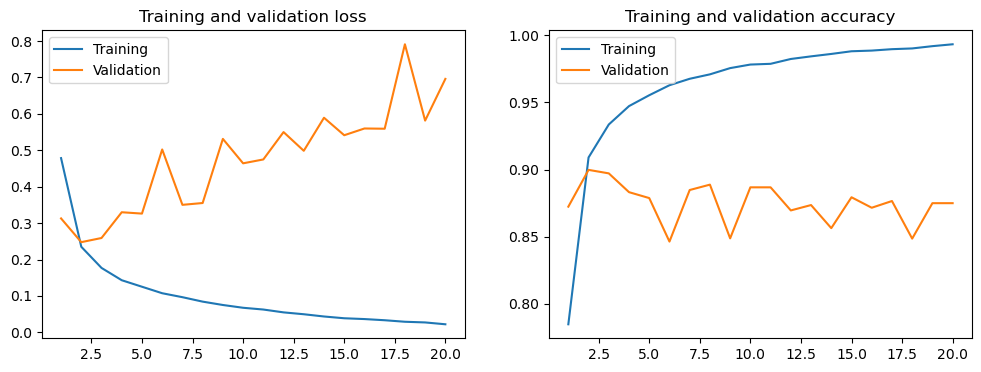

In [23]:
plot_history(history) # overfitting also here

In [24]:
model = tf.keras.models.load_model(
    base_dir / "full_transformer_encoder.keras",
    custom_objects={                                  # special load syntax as our model uses custom layers!
        "TransformerEncoder": TransformerEncoder,
        "PositionalEmbedding": PositionalEmbedding
    }
)
print(f"Test acc: {model.evaluate(int_test_ds)[1]:.3f}")

782/782 [==============================] - 30s 37ms/step - loss: 0.2833 - accuracy: 0.8826
Test acc: 0.883



### The Transformer applied to translation

As said, the full translation system can be found in the notebook [`chapter11_part04_sequence_to_sequence_learning.ipynb`](https://drive.google.com/file/d/1EPPh0vjqwLgzWBlf9TVGZ9dVbo3g4vgW/view?usp=share_link).

---

### 11.4.4 When to use sequence models over bag-of-words models?

<!-- ![Chollet When to use sequence models over bag-of-words models](images/chollet.when-to-use-bow.p349.png) -->
![Chollet When to use sequence models over bag-of-words models](https://drive.google.com/uc?id=1q9-BqB_DTA_IiGDLHKtXaJbIyiy37f6a)

<small>DLWP, p.349</small>

---
### Sequence to sequence modelling

A generic, powerful learning framework for many NLP problems (including machine translation): encode a source sequence first, then use that information to generate a target sequence.

<!-- <img style="height:700px" src="images/nlp/stanford.seq2seq.png"> -->
<img style="height:700px" src="https://drive.google.com/uc?id=1_cSV5Qy1Ln_l75VhlOVialvNAX5zMu2Q">

<small>[Chris Manning, CS224N, Stanford](https://web.stanford.edu/class/cs224n/index.html), [lecture 7](https://web.stanford.edu/class/cs224n/slides/cs224n-2022-lecture07-nmt.pdf)  
The original paper: ["Sequence to Sequence Learning with Neural Networks"](https://arxiv.org/abs/1409.3215)</small>

### Sequence to sequence with attention

However, the previous setup needed to encode **everything** in that last stage. A real translator would look up the source target while translating...

<!-- <img src="images/nlp/seq2seq-nmt-model-fast.gif"> -->
<img src="https://drive.google.com/uc?id=11kGWdBJgrVbGGkXTMjAe74A5kZuNkpiP">

<small>[Google seq2seq documentation](https://google.github.io/seq2seq/)  
And the paper: ["Neural Machine Translation by Jointly Learning to Align and Translate"](https://arxiv.org/abs/1409.0473)</small>


### The Transformer: who *needs* RNNs anyway??

<!-- <img src="images/transformer/apply_the_transformer_to_machine_translation.gif"> -->
<img src="https://drive.google.com/uc?id=1oEGwdJPUFs7P1A5eE7Aow_A3RBt3kvIe">

<small>["Neural machine translation with a Transformer and Keras", TensorFlow](https://www.tensorflow.org/text/tutorials/transformer)  
The paper: [Vaswani et al, "Attention Is All You Need"](https://arxiv.org/abs/1706.03762)</small>


### The Transformer applied to translation

As said, the full translation system can be found in the notebook [`chapter11_part04_sequence_to_sequence_learning.ipynb`](https://drive.google.com/file/d/1EPPh0vjqwLgzWBlf9TVGZ9dVbo3g4vgW/view?usp=share_link).

### The Transformer applied to vision

[Vision Transformers (ViT) Explained](https://www.pinecone.io/learn/vision-transformers/)

Keras tutorial: [Image classification with Vision Transformer](https://keras.io/examples/vision/image_classification_with_vision_transformer/)

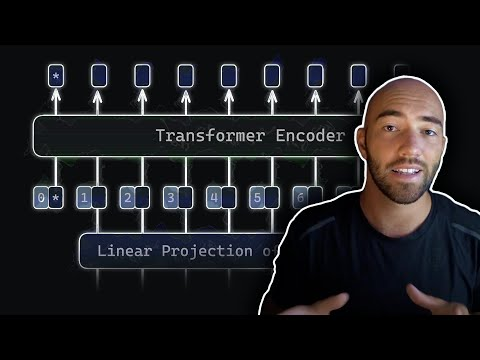

In [2]:
YouTubeVideo('qU7wO02urYU', width=853, height=480) # Vision Transformers (ViT) Explained + Fine-tuning in Python 

## Summary


#### Attention

- **Neural attention** is a way to create context-aware word representations, the basis for the **Transformer**.
  - The operations are $\bbox[5px,border:2px solid red]{“softmax(\mathrm{Query} \cdot \mathrm{Keys)} \cdot \mathrm{Values}”}$.
  - **Multi-head** attention allows us to split the attention process (similar to different filters in a CNN), looking up different types of information in the input.
  - To enforce causality / prevent lookaheads into the future, we use **masking** to zero out values.
  - Attention **ignores order**: reinject that information with **Position Encoding**.
  

### Transformer  
- The full **Transformer** architecture consists of a TransformerEncoder and a TransformerDecoder, has yielded great results in many fields.  
    - The first half, the **TransformerEncoder**, can also be used for text classification or any sort of single-input NLP task.  
    - The second half, the **TransformerDecoder**, can be used to generate text (like an RNN).  
    - Both were developed together with translation in mind, on the basis of the **sequence to sequence** model.

#### Note

When it comes to text classification, you can use Chollet's ratio to help you determine whether to use a bag-of-words model or a sequence model.